# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

### 문제 정의
> 문자 메시지 스팸 분류 문제<br>
> 1. 문자 메시지 데이터 분석
> 2. 스팸 분류 모델 성능 평가
### 학습 데이터
> * train/validation : spam.csv
> * test : spam_test_text.csv
### 변수 소개
> * text : 문자 메시지
> * label : 스팸여부

### References
> * 한국어 처리
>> * [konlpy - 한국어 처리 라이브러리](https://konlpy.org/ko/latest/)
>> * [한국어 품사 태그 비교표](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)
>> * [한국어 품사 태깅 성능 비교](https://konlpy.org/ko/latest/morph/#comparison-between-pos-tagging-classes)
>> * [한국어 시스템 사전](https://konlpy.org/ko/latest/data/#corpora)

> * 자연어 처리
>> * [NLTK](https://www.nltk.org/book/)
>> * [gensim](https://radimrehurek.com/gensim/)
>> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-2)
>> * [WordCloud](https://amueller.github.io/word_cloud/)

----

# 데이터 탐색부터 먼저 시작해보겠습니다.

---

### 0. 라이브러리 설치 및 불러오기

In [5]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud

In [7]:
## import sklearn
import pandas as pd

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import tensorflow as tf
fm.findSystemFonts()
plt.rcParams['font.family']= ["NanumGothicCoding"]
plt.rcParams["axes.unicode_minus"]=False
# GPU 환경 설정하기
# assert tf.test.is_gpu_available() == True, 'GPU 설정을 확인하세요.'
print(tf.config.list_physical_devices('GPU'))
print(tf.config.list_logical_devices('GPU'))

[]
[]


### 1. 데이터 준비
#### 1-1. 데이터 가져오기

In [8]:
# 데이터를 가져옵니다.
import pandas as pd

In [12]:
train_filename = '/aihub/workspace/spam.csv'

In [13]:
data = pd.read_csv(train_filename)

### 1-2. 데이터 확인하기

In [15]:
# head 함수를 이용해 데이터를 확인해봅니다. (띄어쓰기가 되어 있지 않음을 알 수 있어요.)
data.head()

,text,label
0,[Web발신]박춘규회원님손절주식은그만월급배만드는법http://lco.jp/eA,spam
1,[Web발신]골든브릿지에서손실을보셨나요??http://bitly.kr/bRGtq[FW],spam
2,[Web발신][대//박]가(.원)입코(WN)드MEP.com,spam
3,[Web발신](광고)이정미님아직도주식하시나요http://pf.kakao.com/_u...,spam
4,[Web발신]송승용님사람이모이는곳에는이유가있습니다하루~정보공개is.gd/JsJP,spam


In [16]:
# info() 함수를 이용해서 데이터의 정보를 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20089 non-null  object
 1   label   20100 non-null  object
dtypes: object(2)
memory usage: 314.2+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


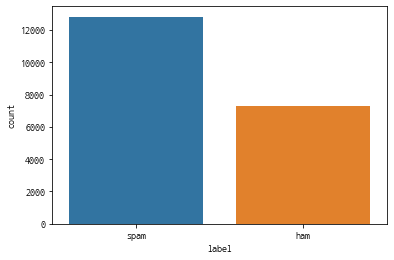

In [19]:
# label 데이터 분포를 확인합니다.
import seaborn as sns

sns.countplot(data['label'])
plt.show()

In [20]:
# descibe 함수를 이용해서 기본 정보를 확인합니다.
data.describe()

,text,label
count,20089,20100
unique,18386,2
top,[Web발신]회원님예치금원보유중보관기간끝납니다해저.한국<<안심다운로드코드,spam
freq,107,12817


In [22]:
data = data.drop_duplicates(['text'], keep='first', inplace=False, ignore_index=False)
data.describe()

,text,label
count,18386,18387
unique,18386,2
top,(광고)세인론**새로운월행복듬뿍받으시고좋은일만가득가득하길바래요~()~^^거부**,spam
freq,1,11483


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18387 entries, 0 to 20099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    18386 non-null  object
 1   label   18387 non-null  object
dtypes: object(2)
memory usage: 430.9+ KB


#### 1-3. 결측치 제거

In [36]:
# 결측치를 제거한 후 확인합니다.
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18386 entries, 0 to 20099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    18386 non-null  object
 1   label   18386 non-null  object
dtypes: object(2)
memory usage: 430.9+ KB


### 2. 텍스트 데이터 분석

#### 2-1. 텍스트 길이 분포 

In [37]:
data['text']

0              [Web발신]박춘규회원님손절주식은그만월급배만드는법http://lco.jp/eA
1         [Web발신]골든브릿지에서손실을보셨나요??http://bitly.kr/bRGtq[FW]
2                         [Web발신][대//박]가(.원)입코(WN)드MEP.com
3        [Web발신](광고)이정미님아직도주식하시나요http://pf.kakao.com/_u...
4             [Web발신]송승용님사람이모이는곳에는이유가있습니다하루~정보공개is.gd/JsJP
                               ...                        
20095    [Web발신]이상투자황기봉님"이재훈"투자컨설담당자배정완료.담당자확인▼http://b...
20096          [Web발신](광고)조마?峙???충?矛?%:까지　↓주소Joma.카JM톡무료거부
20097    [Web발신]김환택님지금이라도늦지않았습니다.월긴급정보http://pf.kakao.c...
20098    [Web발신]년노하우명품구매대행논스토리nonstory.com항상아낌없는사랑과성원에감...
20099         [Web발신]최현님월일특급정보!https://pf.kakao.com/_SfcsT
Name: text, Length: 18386, dtype: object

In [39]:
# 텍스트 길이 분포와 최대 길이를 확인합니다.
text_length = []

for text in data['text']:
    text_length.append(len(text))

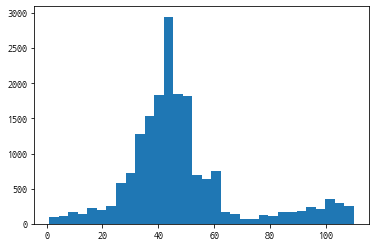

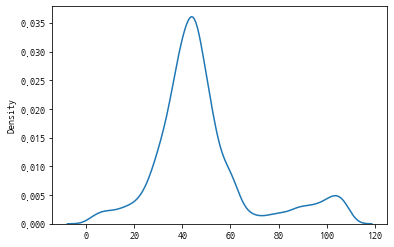

In [43]:
plt.hist(text_length, bins=32)
plt.show()

sns.kdeplot(text_length)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


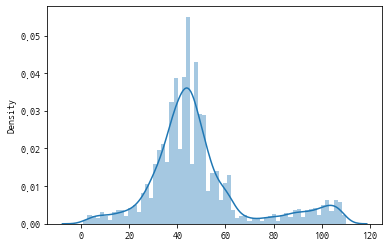

In [45]:
sns.distplot(text_length, hist=True, bins=64)
plt.show()

In [47]:
# konlpy를 활용하여 태깅 클래스를 불러옵니다.
import nltk
from konlpy.tag import Mecab

mecab = Mecab()

#### 2-2. 형태소/명사 추출

In [52]:
# 태깅 클래스를 활용하여 형태소/명사를 추출합니다.
morphs_data = []
for text in data['text']:
    morphs_data.append(mecab.morphs(text))
print(len(morphs_data))
morphs_data[:1]

18386


[['[',
  'Web',
  '발신',
  ']',
  '박춘규',
  '회원',
  '님',
  '손절',
  '주식',
  '은',
  '그만',
  '월급',
  '배',
  '만드',
  '는',
  '법',
  'http',
  ':',
  '/',
  '/',
  'lco',
  '.',
  'jp',
  '/',
  'eA']]

In [51]:
nouns_data = []
for text in data['text']:
    nouns_data.append(mecab.nouns(text))
print(len(nouns_data))
nouns_data[:1]

18386


[['발신', '박춘규', '회원', '손절', '주식', '월급', '배', '법']]

In [55]:
# Number of Samples / Number of words per sample 확인합니다.
# https://developers.google.com/machine-learning/guides/text-classification/step-2-5 참고
nuber_of_samples = len(morphs_data)
print(len(morphs_data))
print(len(nouns_data))

18386
18386


In [102]:
number_of_words_per_morphs = 0
number_of_words_per_nouns = 0
for i in range(nuber_of_samples):
    number_of_words_per_morphs += len(morphs_data[i])
    number_of_words_per_nouns += len(nouns_data[i])
number_of_words_per_morphs /= nuber_of_samples
number_of_words_per_nouns /= nuber_of_samples

print(nuber_of_samples/number_of_words_per_morphs)
print(nuber_of_samples/number_of_words_per_nouns)

671.5396394034025
1724.6137787482398


#### 2-3. NLTK Text로 변환

In [73]:
# Tokenize한 문자 데이터를 하나의 nltk.Text로 변환합니다.
join_data = " ".join(data['text'])

morphs = mecab.morphs(join_data)
nouns = mecab.nouns(join_data)

In [74]:
nltk_morphs_data = nltk.Text(morphs)
nltk_nouns_data = nltk.Text(nouns)

In [75]:
nltk_morphs_data

<Text: Web 발신>

In [76]:
type(nltk_morphs_data)

nltk.text.Text

#### 2-4. Frequency plot

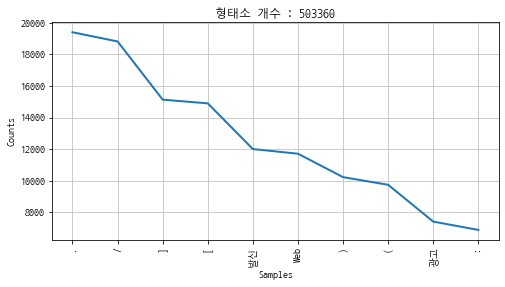

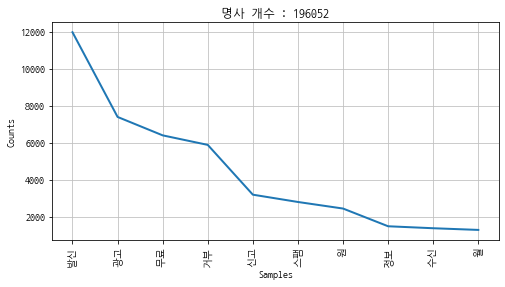

In [78]:
# 형태소/명사 추출 각각 단어 분포를 확인합니다.
plt.figure(figsize=(8,4))
plt.title("형태소 개수 : " + str(len(nltk_morphs_data.tokens)))
nltk_morphs_data.plot(10)
plt.figure(figsize=(8,4))
plt.title("명사 개수 : " + str(len(nltk_nouns_data.tokens)))
nltk_nouns_data.plot(10)
plt.show()

#### 2-5. Similar words

In [81]:
# 어떤 단어(스팸, 주식...)의 유사 단어를 확인합니다.
nltk_morphs_data.similar('광고')

월 투 fw 무료 듀 일 인증 안녕 월일 이 만 전화 https 고객 년 행복 한 메시지 원 내일


#### 2-6. Vocabulary

In [82]:
# 단어 사전을 확인합니다.
nltk_nouns_data.similar('광고')

발신 안녕 월 증권 무료 투 일 고객 오늘 인증 메시지 월일 년 듀 회원 제목 여름 원 감사 주


In [84]:
nltk_morphs_data.concordance('광고',width=20,lines=5)

Displaying 5 of 7417 matches:
b 발신 ] ( 광고 ) 이정미 님 
출담당자 - ( 광고 ) pf . k
 무료 거부 ( 광고 ) SHOWWi
 무료 거부 ( 광고 ) cb 엘 c
b 발신 ] ( 광고 ) 자산관리 재


In [85]:
nltk_nouns_data.concordance('광고',width=20,lines=5)

Displaying 5 of 7417 matches:
박 원 코 발신 광고 이정미 주식 발
건강 조심 행복 광고 김영일 손실 무
 앱 무료 거부 광고 화질 초 무료 
 초 무료 거부 광고 무료 거부 발신
무료 거부 발신 광고 자산관리 재테크


In [87]:
nltk_nouns_data.index('광고')

18

#### 2-7. Collocation

In [88]:
# 연어(collocation)들을 확인합니다.
nltk_morphs_data.collocations(window_size=5)
print("*"*50)
nltk_nouns_data.collocations(window_size=5)

kakao com; http nazr; KISA 메시지; hoy HQv; MMS Web; Web Web; https
tuney; 다이소 선정릉; 홍지윤 종잣돈; 선정릉 모바일; 다이소 모바일; http bitly; hoy rrzSz; ㅋㅋㅋ
ㅋㅋㅋ; tuney mdFoyK; GCtvj friend; 선정릉 http; http bIt; 다이소 http; com
GCtvj
**************************************************
다이소 선정릉; 홍지윤 종잣돈; 선정릉 모바일; 다이소 모바일; 이재훈 담당자; 김정태 서포터; 김지훈 관리사; 스파클
선정릉; 스파클 다이소; 스파클 모바일; 스포츠 실시간; 전업주부 장영옥; 컨설팅 이페이; 네이처 컬렉션; 상품명 세탁기;
코오롱 모나미; 전업주부 강현주; 담당자 담당자; 퍼펙트 싸이클론; 이페이 지난달


#### 3. WordCloud

#### 3-1. Morphs vs Nouns

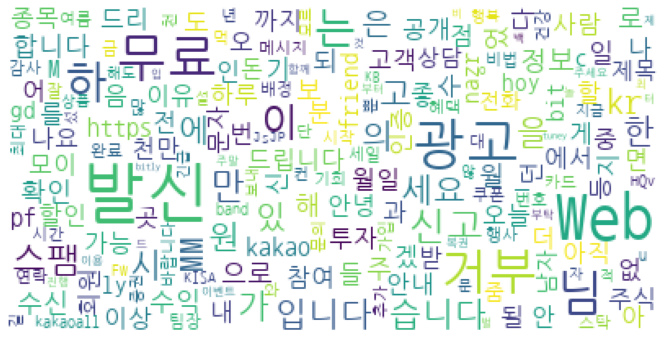

In [91]:
# 형태소와 명사 추출 각각에 대해 wordcloud로 확인합니다.
import matplotlib.font_manager as font_manager
from wordcloud import WordCloud
NGC_path = font_manager.findfont('NanumGothicCoding')
#wc = WordCloud(font_path=NGC_path,max_font_size=40).generate(constitution)
wc = WordCloud(font_path=NGC_path,max_font_size=40,background_color="white",collocations=False).generate(' '.join(nltk_morphs_data))
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.show()

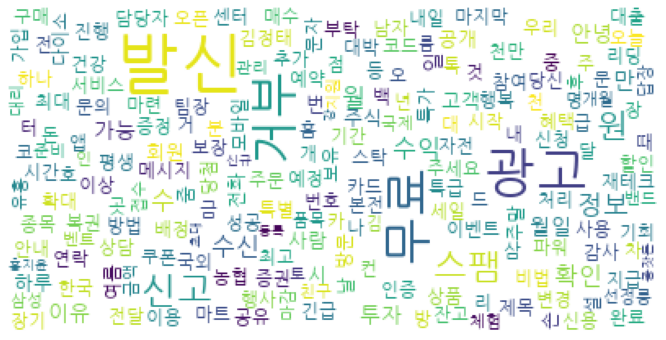

In [90]:
import matplotlib.font_manager as font_manager
from wordcloud import WordCloud
NGC_path = font_manager.findfont('NanumGothicCoding')
#wc = WordCloud(font_path=NGC_path,max_font_size=40).generate(constitution)
wc = WordCloud(font_path=NGC_path,max_font_size=40,background_color="white",collocations=False).generate(' '.join(nltk_nouns_data))
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.show()

#### 3-2. Ham vs Spam

In [94]:
# 명사 추출한 결과를 Ham과 Spam에 대해 wordcloud로 확인합니다.
nltk_ham = nltk.Text(mecab.nouns(" ".join(data.loc[data['label']=='ham']['text'])))
nltk_spam = nltk.Text(mecab.nouns(" ".join(data.loc[data['label']=='spam']['text'])))

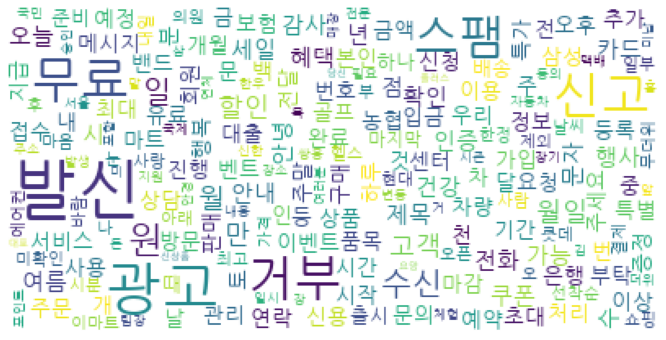

In [95]:
import matplotlib.font_manager as font_manager
from wordcloud import WordCloud
NGC_path = font_manager.findfont('NanumGothicCoding')
#wc = WordCloud(font_path=NGC_path,max_font_size=40).generate(constitution)
wc = WordCloud(font_path=NGC_path,max_font_size=40,background_color="white",collocations=False).generate(' '.join(nltk_ham))
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.show()

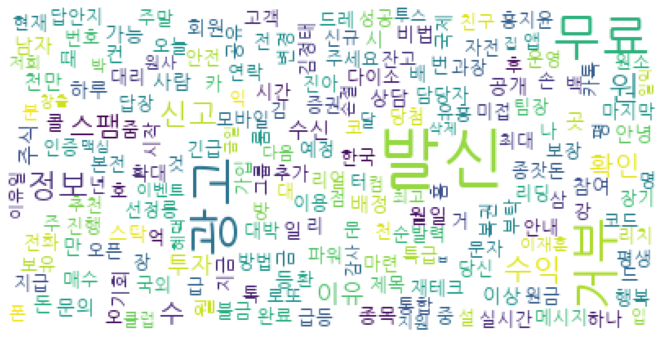

In [96]:
import matplotlib.font_manager as font_manager
from wordcloud import WordCloud
NGC_path = font_manager.findfont('NanumGothicCoding')
#wc = WordCloud(font_path=NGC_path,max_font_size=40).generate(constitution)
wc = WordCloud(font_path=NGC_path,max_font_size=40,background_color="white",collocations=False).generate(' '.join(nltk_spam))
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [100]:
data.loc[data['label']=='ham']

,text,label
5,MMS스팸신고사진사진,ham
7,[Web발신][삼성증권]:****-출금****-박용출님,ham
8,날씨가더워지기시작하고지치기쉬운계절입니다~건강조심하시고매일매일행복하셨으면좋겠습니다~^...,ham
10,MMS스팸신고사모님삼송역스칸센최정애실장입니다시간되실때연락주세요^^오늘도행복한하루되세...,ham
16,MMS스팸신고전주김해운입니다거제의월은바람도좋습니다이달도내내좋은일가득하시고건강하세요전...,ham
...,...,...
20090,(광고)<애플짐>딱!일!회원권추가%할인!!선착순!/까지!<빠른등록필수>무료거부,ham
20091,[Web발신](광고)사계절투어일본아소다카모리특가/출박일만원홀중식외올포함거부,ham
20092,MMS스팸신고[Web발신]안녕하세요선생님풍산화동양행의천대석입니다.전화상으로말씀드린바...,ham
20094,[Web발신]장마철입니다.집안습기제거싹싹싹♬포송포송한월되세요^현대차윤정은^♪,ham


In [101]:
data.loc[data['label']=='spam']

,text,label
0,[Web발신]박춘규회원님손절주식은그만월급배만드는법http://lco.jp/eA,spam
1,[Web발신]골든브릿지에서손실을보셨나요??http://bitly.kr/bRGtq[FW],spam
2,[Web발신][대//박]가(.원)입코(WN)드MEP.com,spam
3,[Web발신](광고)이정미님아직도주식하시나요http://pf.kakao.com/_u...,spam
4,[Web발신]송승용님사람이모이는곳에는이유가있습니다하루~정보공개is.gd/JsJP,spam
...,...,...
20088,[Web발신]양소의님홍지윤의종잣돈모으기공유>http://nazr.in/Zw,spam
20095,"[Web발신]이상투자황기봉님""이재훈""투자컨설담당자배정완료.담당자확인▼http://b...",spam
20096,[Web발신](광고)조마?峙???충?矛?%:까지 ↓주소Joma.카JM톡무료거부,spam
20097,[Web발신]김환택님지금이라도늦지않았습니다.월긴급정보http://pf.kakao.c...,spam
